<a href="https://www.kaggle.com/code/omarmohamed8/airline-customer-satisfaction-analysis?scriptVersionId=132272978" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction:

Customer satisfaction plays a crucial role in the success and growth of any business, and the airline industry is no exception. Airlines strive to provide exceptional experiences to their passengers, ensuring their comfort, convenience, and overall satisfaction throughout their journey. Understanding the factors that influence customer satisfaction is vital for airlines to make informed decisions and improve their services.

The goal of this notebook is to analyze and explore a dataset on airlines customer satisfaction. By leveraging data science techniques, we aim to uncover insights and patterns that can shed light on the key drivers of customer satisfaction in the airline industry. Through this analysis, we aim to provide valuable findings and actionable recommendations that can assist airlines in enhancing their services and delivering exceptional customer experiences.

Specifically, this notebook will focus on examining various aspects of the airline travel experience, including seat comfort, inflight services, online support, and more. By analyzing these factors, we aim to identify which aspects have the most significant impact on customer satisfaction. Furthermore, we will explore any relationships or correlations between different variables to gain a comprehensive understanding of the factors that contribute to overall satisfaction.

Through this exploration, our goal is to not only provide insights into customer satisfaction but also offer practical recommendations to airlines. These recommendations can help them prioritize improvements, allocate resources effectively, and ultimately create a more satisfying and enjoyable travel experience for their passengers.

By sharing these findings and recommendations, we hope to contribute to the ongoing efforts of the airline industry in optimizing customer satisfaction and driving positive customer experiences.

# Overview of the  Airlines Customer satisfaction dataset

This dataset contains 129,880  rows and 23 attributes that provide valuable information about customer transactions and product details. Here is a breakdown of the attributes:

    satisfaction: This column represents the customer's satisfaction level with their overall flight experience. It is a categorical variable with two possible values: "satisfied" or "neutral or dissatisfied".

    Gender: This column indicates the gender of the customer. It is a categorical variable with two possible values: "Male" or "Female".

    Customer Type: This column categorizes the customers based on their type. It is a categorical variable with two possible values: "Loyal Customer" or "Disloyal Customer".

    Age: This column represents the age of the customer. It is a numerical variable denoted in years.

    Type of Travel: This column indicates the purpose of the customer's travel. It is a categorical variable with two possible values: "Business travel" or "Personal travel".

    Class: This column represents the class of service the customer availed. It is a categorical variable with three possible values: "Eco", "Eco Plus", or "Business".

    Flight Distance: This column denotes the distance of the flight in miles. It is a numerical variable.

    Seat comfort: This column represents the customer's satisfaction with the seat comfort. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Departure/Arrival time convenient: This column denotes the customer's satisfaction with the convenience of the departure and arrival times. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Food and drink: This column represents the customer's satisfaction with the food and drink provided during the flight. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Gate location: This column denotes the customer's satisfaction with the gate location. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Inflight wifi service: This column represents the customer's satisfaction with the inflight wifi service. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Inflight entertainment: This column denotes the customer's satisfaction with the inflight entertainment options. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Online support: This column represents the customer's satisfaction with the online customer support. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Ease of Online booking: This column denotes the customer's satisfaction with the ease of online booking. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    On-board service: This column represents the customer's satisfaction with the on-board service provided by the airline. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Leg room service: This column denotes the customer's satisfaction with the leg room provided during the flight. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Baggage handling: This column represents the customer's satisfaction with the airline's baggage handling. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Check-in service: This column denotes the customer's satisfaction with the airline's check-in service. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Cleanliness: This column represents the customer's satisfaction with the cleanliness of the aircraft. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Online boarding: This column denotes the customer's satisfaction with the online boarding process. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

    Departure Delay in Minutes: This column represents the duration of the departure delay in minutes for each flight. It is a numerical variable.

    Arrival Delay in Minutes: This column denotes the duration of the arrival delay in minutes for each flight. It is a numerical variable.

## Import the necessary libraries

In [1]:
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np  # Importing numpy library for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import seaborn as sns  # Importing seaborn library for statistical plotting

from sklearn.preprocessing import LabelEncoder, StandardScaler  # Importing necessary preprocessing functions
from sklearn.model_selection import train_test_split, KFold, cross_val_score  # Importing functions for data splitting and cross-validation

from sklearn.linear_model import LogisticRegression  # Importing logistic regression classifier
from sklearn.tree import DecisionTreeClassifier  # Importing decision tree classifier
from sklearn.ensemble import RandomForestClassifier  # Importing random forest classifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc  # Importing evaluation metrics
from tabulate import tabulate  # Importing tabulate function for table formatting

## Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv')

## Data Exploration
### Display the first few rows of the dataset

In [3]:
# Display the first few rows of the dataset to get an overview
df.head() 

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

Note that the rating columns are set as integers, indicating that they represent discrete ratings or scores

In [5]:
# Calculate the number of missing values in each column
missing_values = df.isna().sum().sort_values(ascending=False)

# Filter columns with non-zero missing values
columns_with_missing_values = missing_values.loc[lambda x: x > 0]

# Display the columns with missing values
columns_with_missing_values

Arrival Delay in Minutes    393
dtype: int64

In [6]:
# Get the column names of the DataFrame
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [7]:
# Categorical columns
categorical_columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

# Numerical columns
numerical_columns = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

In [8]:
# Calculate descriptive statistics for the numerical columns
numerical_stats = df[numerical_columns].describe()

# Display the descriptive statistics
numerical_stats

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,14.713713,15.091129
std,15.119360,1027.115606,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000
50%,40.000000,1925.000000,0.000000,0.000000
75%,51.000000,2544.000000,12.000000,13.000000
max,85.000000,6951.000000,1592.000000,1584.000000


In [9]:
# Convert categorical columns to 'object' data type and calculate descriptive statistics
categorical_stats = df[categorical_columns].astype('object').describe()

# Display the descriptive statistics
categorical_stats

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,satisfied,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,71087,65899,106100,89693,62160,29183,29593,28150,33546,31560,41879,41510,39920,40675,39698,48240,36481,48795,35181


# Data Visualization

### Correlation Heatmap

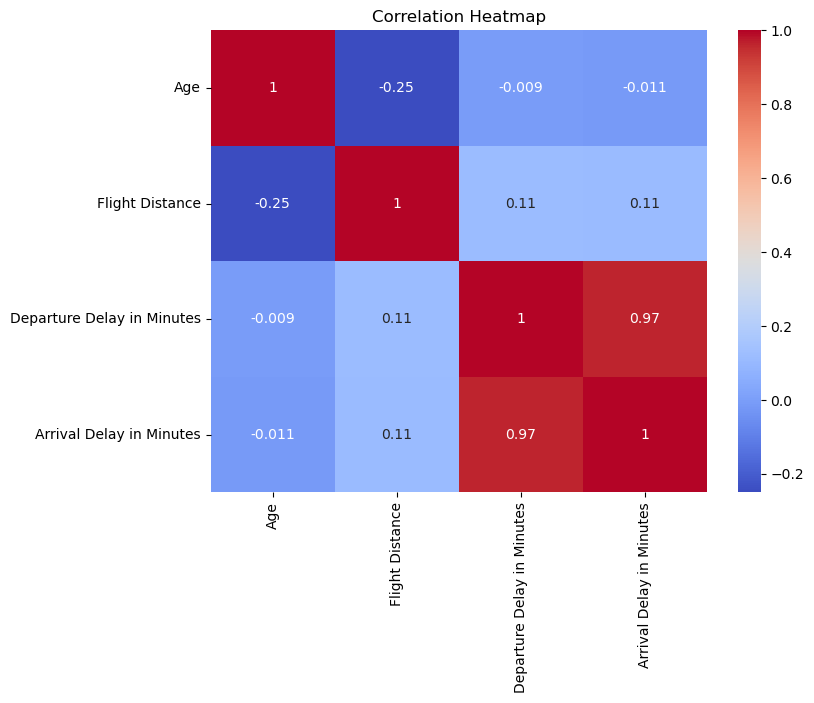

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

We can observe a strong positive correlation between the Departure Delay column and the Arrival Delay column. This correlation is expected since a delay in departure often results in a delay in arrival. As a result, it may be reasonable to consider keeping only one of these columns for further analysis, as they provide similar information.

### Comparing Categorical Variables based on Departure Delay

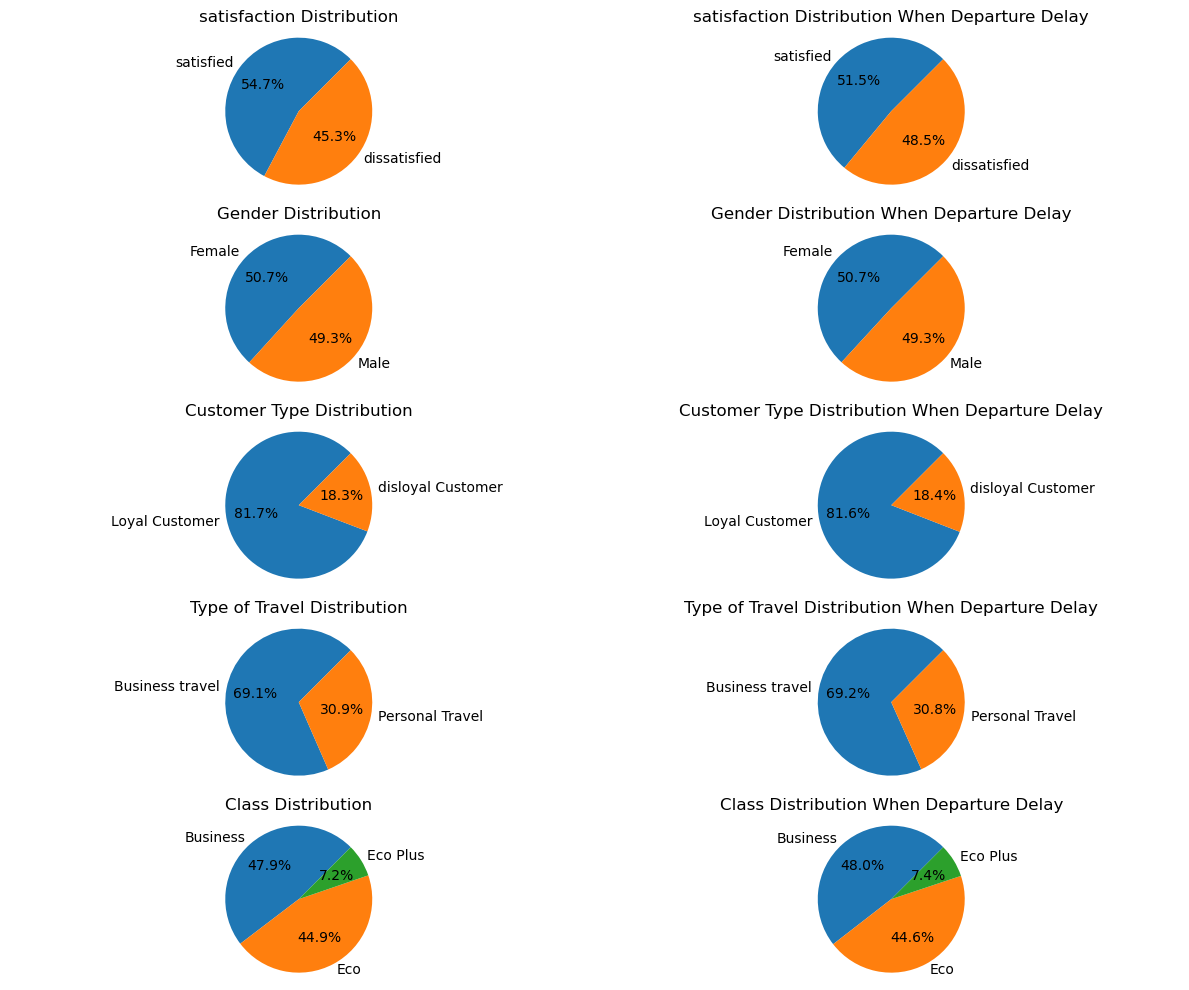

In [11]:
# Define the columns to visualize
columns_to_visualize = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create subplots
fig, axs = plt.subplots(len(columns_to_visualize), 2, figsize=(12, 10))
df_in_delay = df[df['Departure Delay in Minutes'] > 0]

# Iterate through categorical columns
for i, col in enumerate(columns_to_visualize):
    # Get value counts
    counts = df[col].value_counts()
    counts_in_delay = df_in_delay[col].value_counts()

    # Plot pie chart on the left subplot
    axs[i, 0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=45)
    axs[i, 0].set_title(col + ' Distribution')
    axs[i, 0].axis('equal')

    # Plot another pie chart on the right subplot
    axs[i, 1].pie(counts_in_delay, labels=counts_in_delay.index, autopct='%1.1f%%', startangle=45)
    axs[i, 1].set_title(col + ' Distribution When Departure Delay')
    axs[i, 1].axis('equal')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

There doesn't seem to be a noticeable difference in various variables based on the presence or absence of Departure Delay. However, there is a slight difference in satisfaction levels, where more people tend to be dissatisfied when there is a Departure Delay. To confirm this observation, further analysis will be conducted to explore this relationship in more detail.

### Distribution of Age

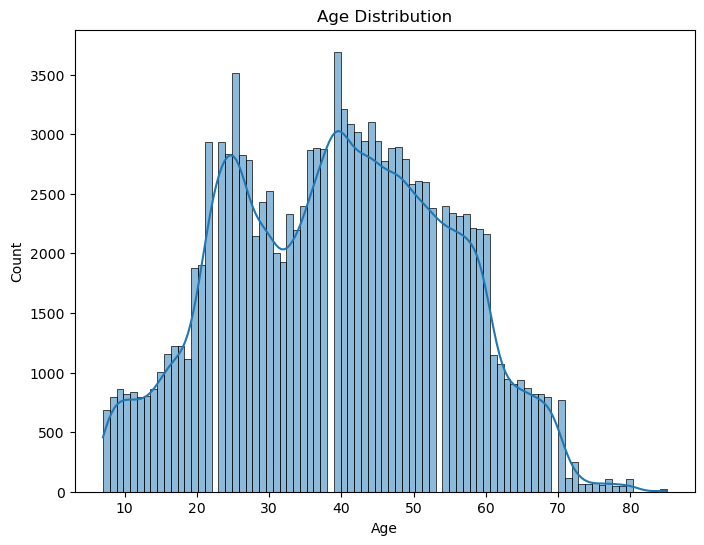

In [12]:
# Distribution of Age
plt.figure(figsize=(8, 6))

# Create a histogram plot of the Age column with a kernel density estimation (KDE)
sns.histplot(data=df, x='Age', kde=True)

# Set the title of the plot
plt.title('Age Distribution')

# Display the plot
plt.show()

### Scatter plot of Flight Distance vs. Departure Delay

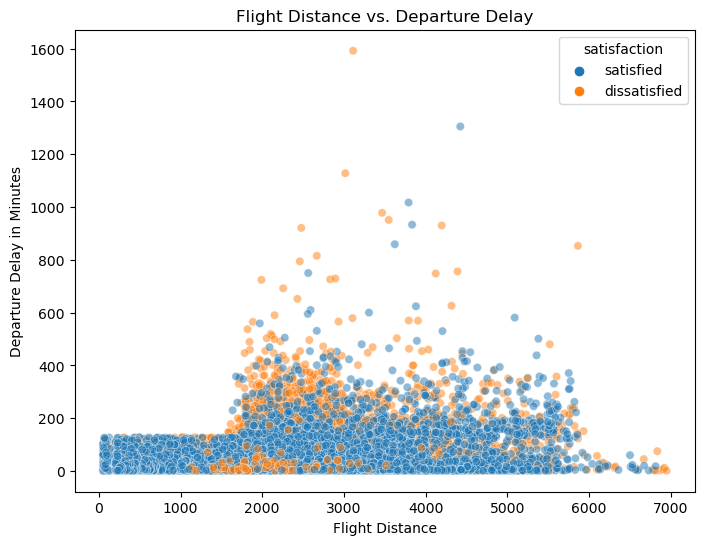

In [13]:
# Scatter plot of Flight Distance vs. Departure Delay in Minutes
plt.figure(figsize=(8, 6))

# Create a scatter plot of Flight Distance vs. Departure Delay in Minutes, segmented by satisfaction
sns.scatterplot(data=df_in_delay, x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', alpha=0.5)

# Set the title of the plot
plt.title('Flight Distance vs. Departure Delay')

# Display the plot
plt.show()

The scatter plot reveals an interesting pattern: when the flight distance is less than 1500 km, there is either no delay or the delay is relatively minimal compared to longer distances. However, a noteworthy finding is that for longer distances, even with the same amount of delay, a higher proportion of people tend to be dissatisfied. Moreover, as the delay increases for longer distances, the dissatisfaction among passengers also tends to rise. This suggests that both the flight distance and the extent of delay contribute to passenger satisfaction levels.

### Compare customer satisfaction across different categories

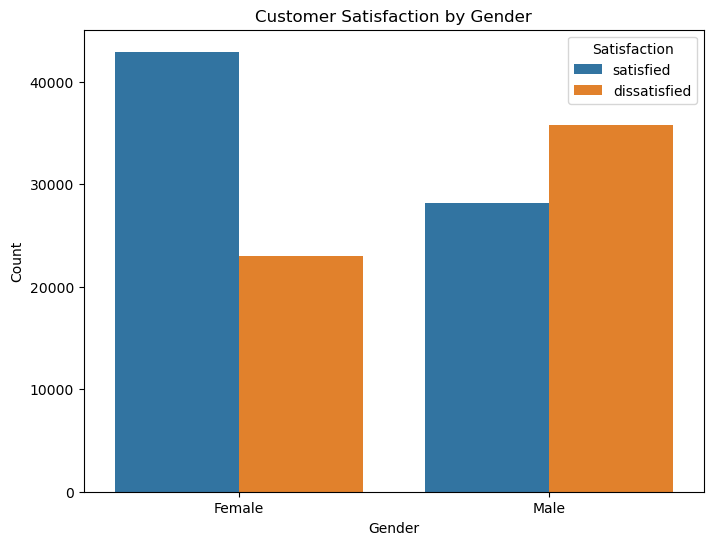

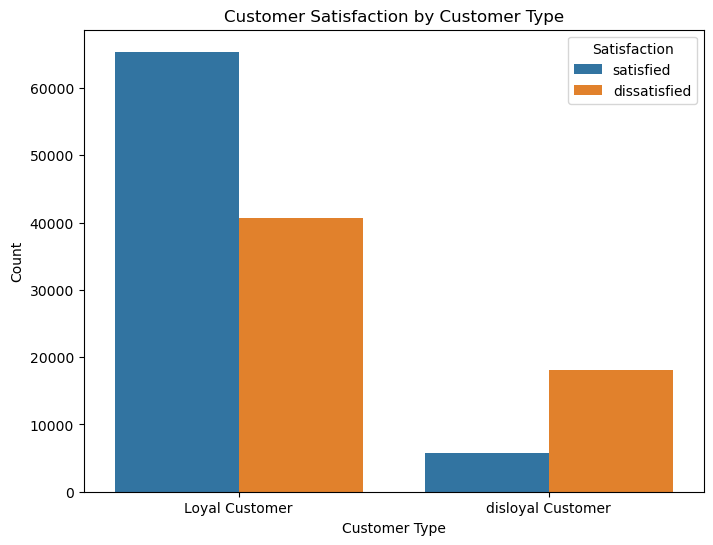

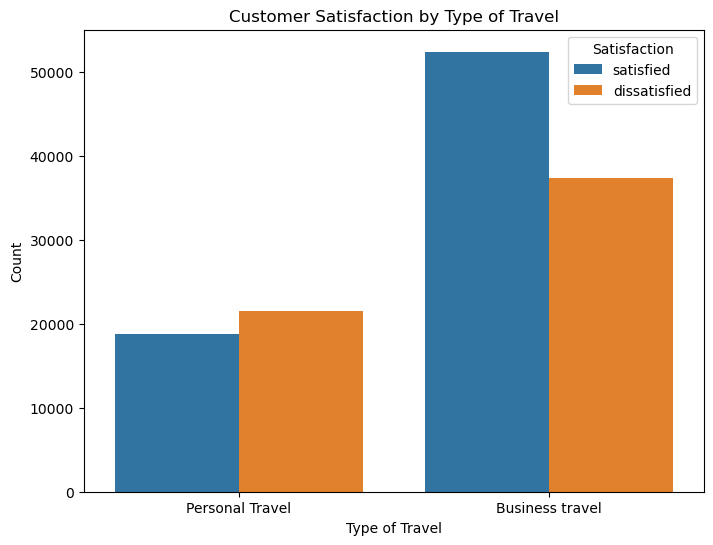

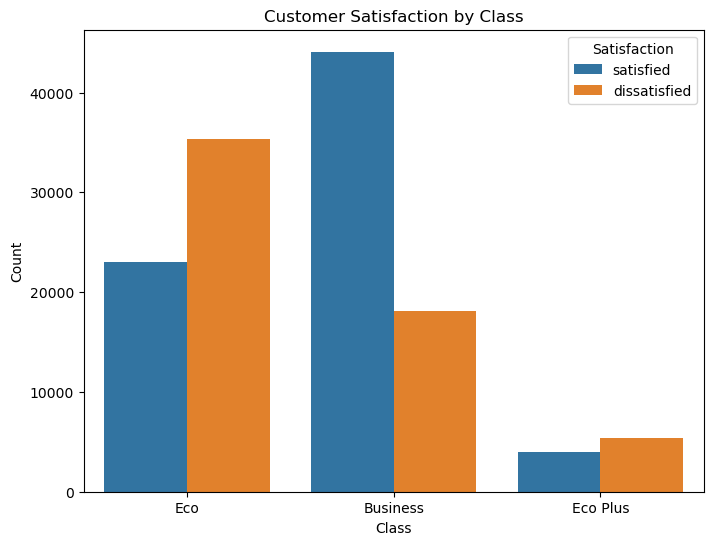

In [14]:
# Compare customer satisfaction across different categories
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Iterate through each categorical column
for col in categorical_columns:
    # Create a new figure with the specified size
    plt.figure(figsize=(8, 6))
    
    # Create a countplot to compare customer satisfaction by the current categorical column
    sns.countplot(data=df, x=col, hue='satisfaction')
    
    # Set the title of the plot
    plt.title('Customer Satisfaction by {}'.format(col))
    
    # Set the labels for x-axis and y-axis
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add a legend for the satisfaction categories
    plt.legend(title='Satisfaction', loc='upper right')
    
    # Display the plot
    plt.show()

The analysis shows a notable difference in satisfaction levels between genders. It appears that males tend to have a higher proportion of dissatisfaction, while females exhibit a higher proportion of satisfaction. This suggests that gender may play a role in influencing passenger satisfaction in the given dataset.

The findings from the analysis demonstrate a clear distinction in satisfaction levels between loyal and disloyal customers. It is evident that loyal customers generally exhibit higher satisfaction, while disloyal customers are more prone to dissatisfaction. These results underscore the significant influence of customer loyalty on overall satisfaction, with loyal customers tending to have a more positive perception of their experiences compared to disloyal customers.

The analysis reveals that customers who book a Business class are more likely to report higher levels of satisfaction compared to customers who book Economy or Economy Plus classes. Furthermore, there is a gradual decrease in satisfaction levels from Business class to Economy Plus and then to Economy class. This suggests that the level of satisfaction is influenced by the class of service chosen, with higher-class services typically associated with a higher satisfaction rate.

### Compare customer satisfaction across Rating variable

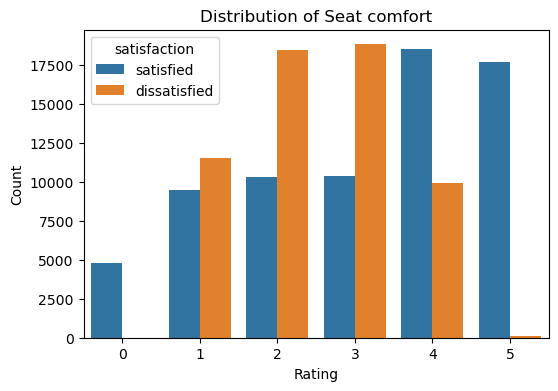

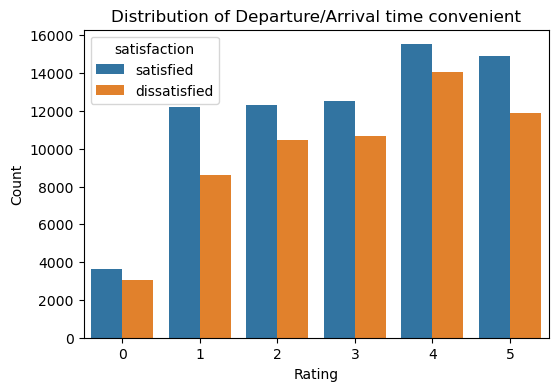

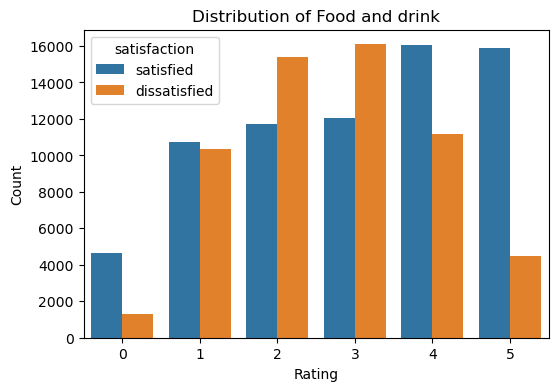

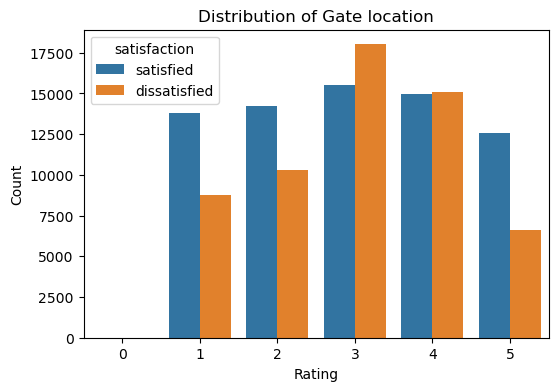

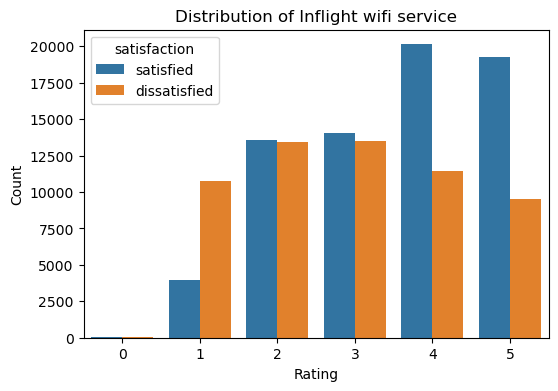

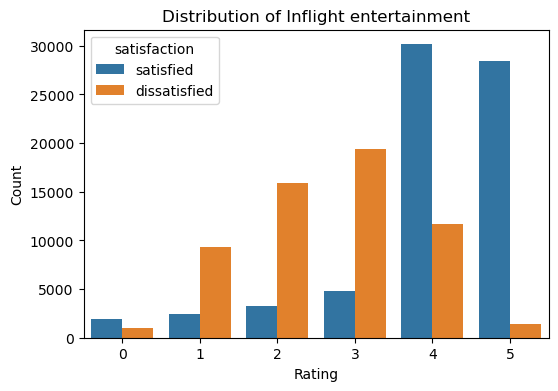

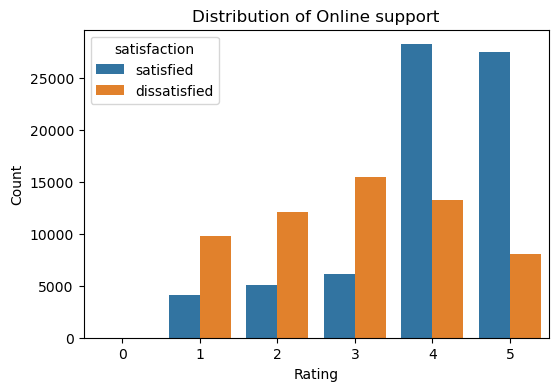

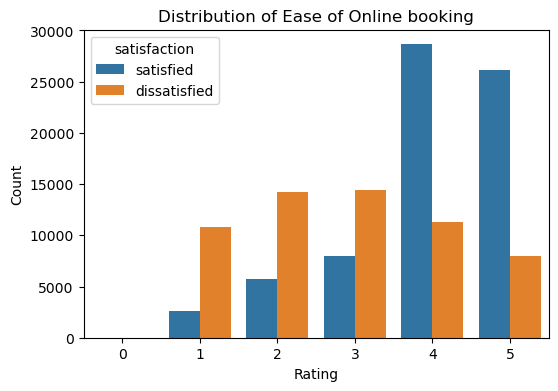

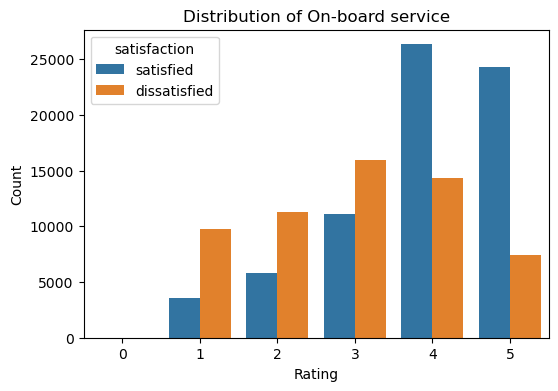

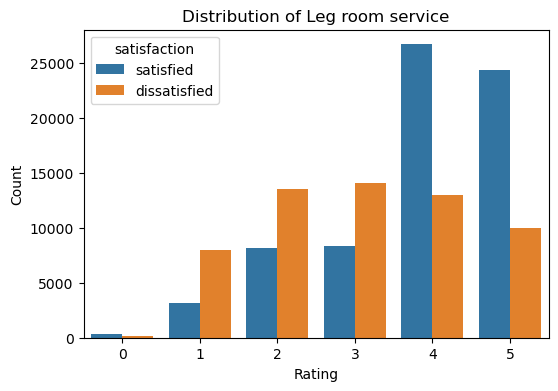

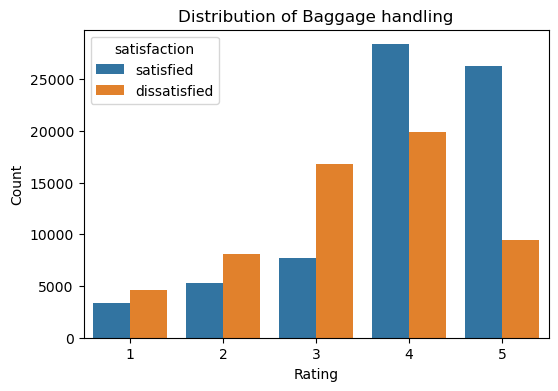

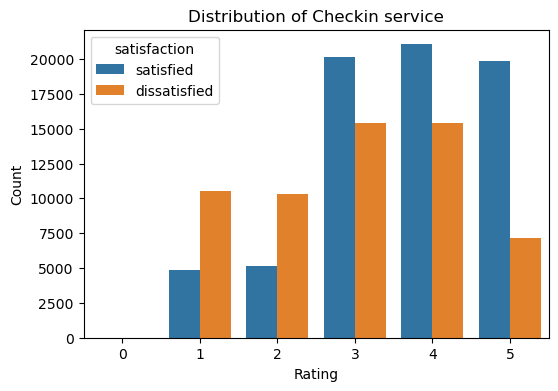

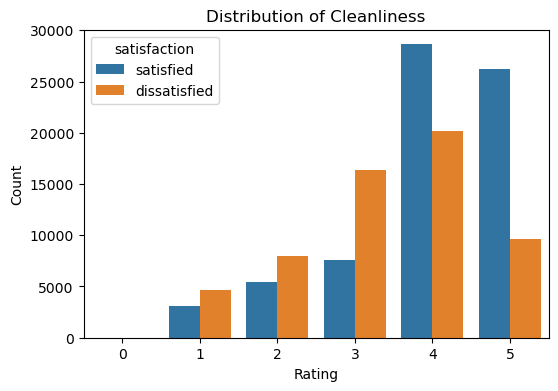

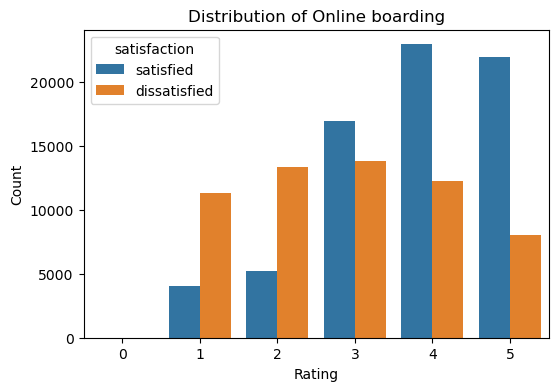

In [15]:
# Define the rating columns to visualize
rating_columns = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                  'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                  'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                  'Online boarding']

# Iterate through each rating column
for col in rating_columns:
    # Create a new figure with a specified size
    plt.figure(figsize=(6, 4))
    
    # Plot a countplot to visualize the distribution of ratings
    sns.countplot(data=df, x=col, hue='satisfaction')
    
    # Set the title of the plot
    plt.title('Distribution of {}'.format(col))
    
    # Set the x-axis label
    plt.xlabel('Rating')
    
    # Set the y-axis label
    plt.ylabel('Count')
    
    # Rotate the x-axis labels to be horizontal
    plt.xticks(rotation=0)
    
    # Display the plot
    plt.show()

The examination indicates that there is a noticeable correlation between the ratings assigned to various services and the level of customer satisfaction. It is evident that when customers provide higher ratings for factors such as seat comfort, food and drink, inflight entertainment, and other services, it is associated with a greater likelihood of satisfaction. This suggests that customers who express more positive evaluations for these services tend to have a more fulfilling overall experience.

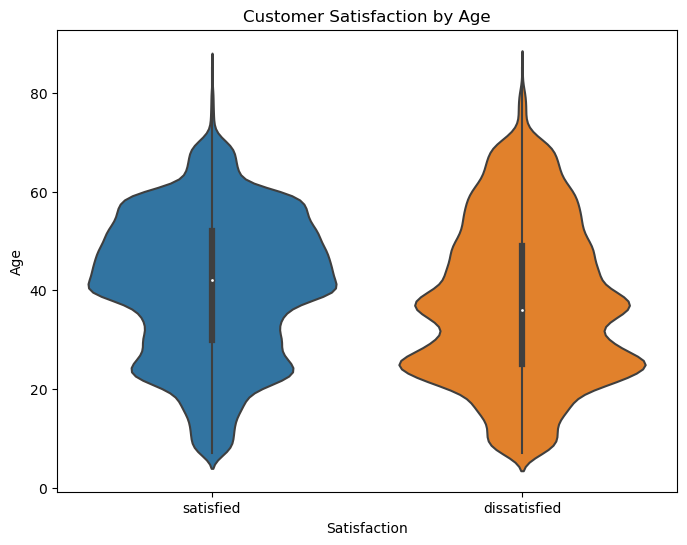

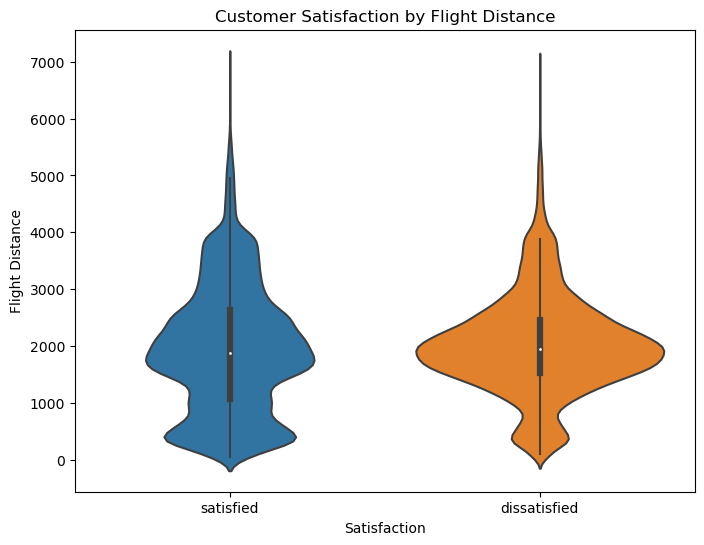

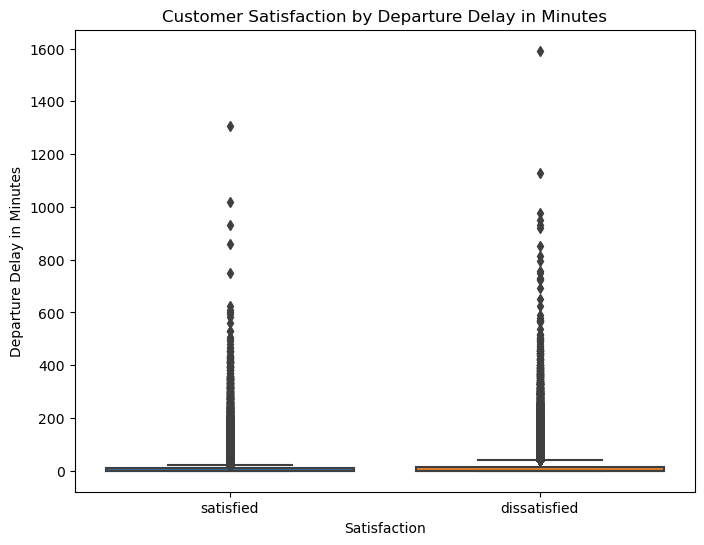

In [16]:
# Variables to analyze satisfaction across different categories
Numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

# Iterate through each variable
for variable in Numerical_columns:
    plt.figure(figsize=(8, 6))
    
    # Create a violin plot to compare satisfaction across the variable
    if variable == 'Departure Delay in Minutes':
        # For 'Departure Delay in Minutes', use a box plot instead of a violin plot
        sns.boxplot(data=df, x='satisfaction', y=variable)
    else:
        # For other numerical variables, use a violin plot
        sns.violinplot(data=df, x='satisfaction', y=variable)
    
    # Set the title of the plot
    plt.title('Customer Satisfaction by {}'.format(variable))
    
    # Set the x-axis label
    plt.xlabel('Satisfaction')
    
    # Set the y-axis label
    plt.ylabel(variable)
    
    # Display the plot
    plt.show()

The violin plot highlights a significant contrast in the age distribution between satisfied and unsatisfied individuals. It demonstrates that satisfied individuals generally have a higher average age compared to those who are not satisfied. This finding suggests a potential influence of age on satisfaction levels, with older individuals tending to express higher levels of satisfaction. One possible explanation for this pattern could be that younger people are more discerning and particular in their expectations, making it comparatively more challenging to meet their satisfaction criteria.

In [17]:
# Group the dataframe by 'satisfaction' and calculate descriptive statistics and sum of departure delays
departure_delay_stats = df.groupby('satisfaction')['Departure Delay in Minutes'].agg(['describe', 'sum'])

# Print the results
departure_delay_stats

describe                                                     \
                count       mean        std  min  25%  50%   75%     max   
satisfaction                                                               
dissatisfied  58793.0  17.807749  43.513060  0.0  0.0  0.0  16.0  1592.0   
satisfied     71087.0  12.154768  32.676796  0.0  0.0  0.0   9.0  1305.0   

                                    sum  
             Departure Delay in Minutes  
satisfaction                             
dissatisfied                    1046971  
satisfied                        864046

Interestingly, although the count of dissatisfied individuals is lower than that of satisfied individuals, the sum of Departure Delays among the dissatisfied group is higher. This suggests a clear relationship between Departure Delays and dissatisfaction. It indicates that Departure Delays have a significant impact on customer satisfaction, with a higher likelihood of dissatisfaction when delays occur. Despite the lower count, the cumulative effect of Departure Delays on dissatisfaction is evident, highlighting the importance of timely departures in ensuring customer satisfaction.

# Data Preprocessing 

### Dropping Unnecessary Column

In [18]:
# Drop the 'Arrival Delay in Minutes' column from the dataframe
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

### Splitting Data into Features and Target Variable

In [19]:
# Split the dataframe into features (X) and target variable (y)
X = df.drop('satisfaction', axis=1)
y = df.satisfaction

### Preprocessing Categorical and Numerical Features

In [20]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# Iterate over each categorical column in your DataFrame
for col in categorical_columns:
    # Fit the encoder on the categorical column
    X[col] = le.fit_transform(X[col])
    
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numeric columns
X[Numerical_columns] = scaler.fit_transform(X[Numerical_columns])

# Print the updated DataFrame
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0,0,1.691351,1,1,-1.671103,0,0,0,2,...,4,2,3,3,0,3,5,3,2,-0.386481
1,1,0,0.500820,1,0,0.469852,0,0,0,3,...,2,2,3,4,4,4,2,3,2,7.756204
2,0,0,-1.615680,1,1,0.152458,0,0,0,3,...,0,2,2,3,3,4,4,4,2,-0.386481
3,0,0,1.360648,1,1,-1.322552,0,0,0,3,...,4,3,1,1,0,1,4,1,3,-0.386481
4,0,0,2.022054,1,1,-1.584452,0,0,0,3,...,3,4,2,2,0,2,4,2,5,-0.386481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,-0.689712,1,1,-0.243799,5,5,5,3,...,5,2,2,3,3,4,4,4,2,-0.386481
129876,1,1,1.559070,1,0,0.102804,2,3,2,4,...,1,1,3,2,3,3,1,2,1,4.183929
129877,1,1,1.955913,1,1,0.329653,3,0,3,3,...,2,2,4,4,3,4,2,3,2,3.684862
129878,1,1,1.757491,1,1,0.456222,3,2,3,2,...,2,2,3,3,2,3,2,1,2,4.682997


### Splitting Data into Training and Testing Sets

In [21]:
# Split the data into training and testing sets
# with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - X shape:", X_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (103904, 21)
Testing set - X shape: (25976, 21)
Training set - y shape: (103904,)
Testing set - y shape: (25976,)


# Model Training

### Model Selection and Cross-Validation

In [22]:
# Define a list of models to evaluate
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Define the number of splits for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model and perform cross-validation
for model in models:
    # Perform cross-validation and compute accuracy scores
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # Print the mean accuracy score for the current model
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}")

LogisticRegression: Mean Accuracy = 0.8349534142180943
DecisionTreeClassifier: Mean Accuracy = 0.9374615041067859
RandomForestClassifier: Mean Accuracy = 0.9569025080704365


The code evaluates the performance of three different models: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier.
Cross-validation is used to assess the models' performance. The data is divided into 5 folds, and each model is evaluated on these folds.
The accuracy metric is used to measure the performance of the models.
The code computes the mean accuracy score for each model based on the cross-validation results.
The mean accuracy scores are printed, providing an indication of how well each model performs in terms of classification accuracy.
This approach allows for a fair comparison of the models and helps in selecting the best model for the given task.

Based on the evaluation results, the Random Forest Classifier exhibited the highest mean accuracy score among the three models. Therefore, we will select the Random Forest algorithm as it demonstrates the best performance in terms of classification accuracy.

### Model Training and Prediction

In [23]:
# Create an instance of RandomForestClassifier
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Get the predicted probabilities for class 1 (satisfaction = 'satisfied')
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation

We will assess the performance of our model on unseen data to determine if it maintains the same level of performance. By evaluating the model on data it has not been trained on, we can gain insights into its generalization capability and assess its effectiveness in real-world scenarios.

### Confusion Matrix

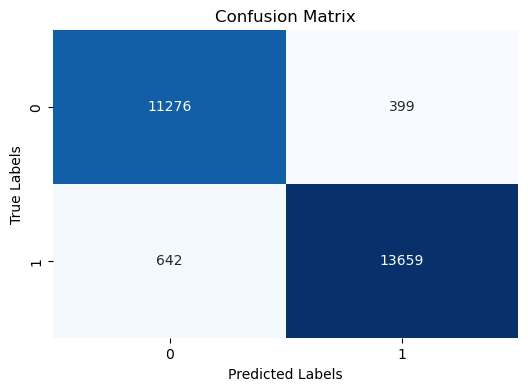

In [24]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [25]:
# Generate classification report
class_report = classification_report(y_test, y_pred)

# Split the classification report into rows
rows = class_report.split('\n')[1:]

# Split each row into columns and remove unnecessary whitespace
table = [[i.strip() for i in row.split('      ')] for row in rows]

# Remove the unnecessary value
del table[4][1]

# Set the headers for the table
header = ['', 'precision', 'recall', 'f1-score', 'support']

# Format the classification report as a table using the tabulate library
report_table = tabulate(table, headers=header, tablefmt='github')

# Print the classification report table
print(report_table)

|              | precision   | recall   | f1-score       |
|--------------|-------------|----------|----------------|
|              |             |          |                |
| dissatisfied | 0.95        | 0.97     | 0.96     11675 |
| satisfied    | 0.97        | 0.96     | 0.96     14301 |
|              |             |          |                |
| accuracy     |             |          | 0.96     25976 |
| macro avg    | 0.96        | 0.96     | 0.96     25976 |
| weighted avg | 0.96        | 0.96     | 0.96     25976 |
|              |             |          |                |


### ROC Curve

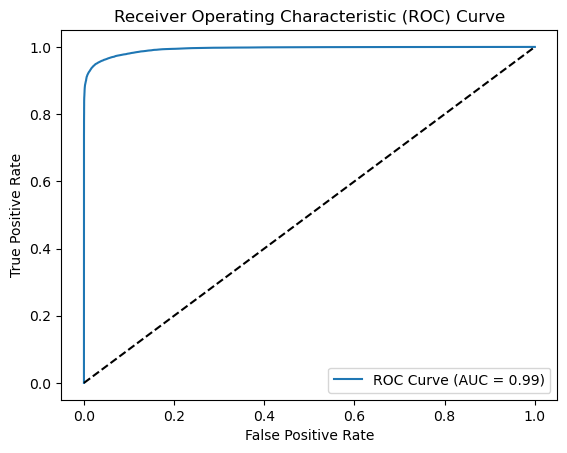

In [26]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_test)

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_encoded, y_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

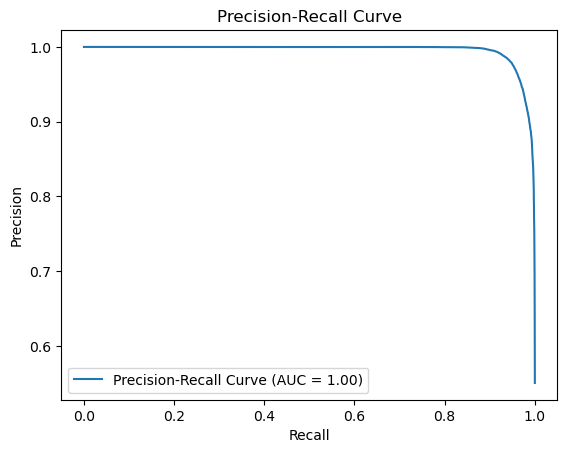

In [27]:
# Calculate precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_encoded, y_prob)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### Feature Importance

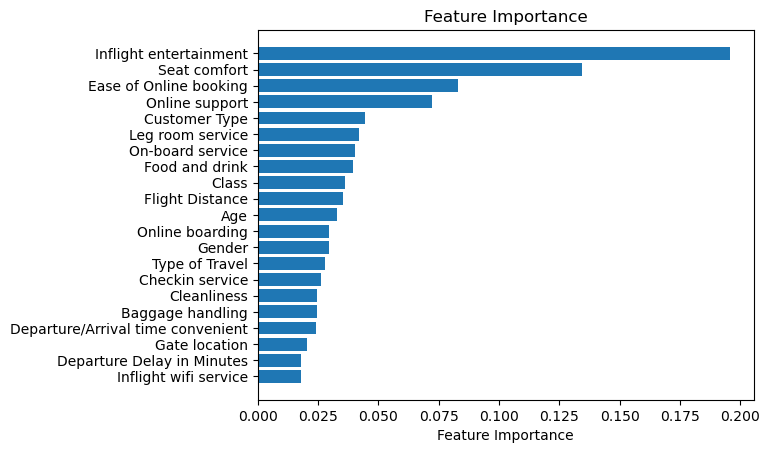

In [28]:
# Check if the trained model has attribute 'feature_importances_'
if hasattr(model, 'feature_importances_'):
    # Retrieve feature importance values
    feature_importance = model.feature_importances_
    # Sort feature importance indices
    sorted_idx = np.argsort(feature_importance)
    # Retrieve feature names
    features = X.columns
    # Plot feature importance
    plt.figure()
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), features[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()

# Conclusion

In conclusion, this notebook provides valuable insights into customer satisfaction in the airline industry. Factors such as inflight entertainment, seat comfort, ease of online booking, and online support have a significant impact on satisfaction levels.

Based on the analysis, we recommend focusing on improving these areas to enhance customer experiences and increase satisfaction. Additionally, addressing departure delays and ensuring prompt and reliable services can help mitigate dissatisfaction.

The random forest classifier model demonstrated good performance, indicating its potential for predicting customer satisfaction. Further refinement and evaluation of the model on additional datasets can enhance its accuracy and reliability.

By implementing these suggestions and leveraging the findings from this analysis, airlines can optimize customer satisfaction, foster loyalty, and ultimately drive business success.